## Homework
The goal of this homework is to train a simple model for predicting the duration of a ride - similar to what we did in this module.

### Q1. Downloading the data
[The data link address of NYC Dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page)

Read the data for January. How many columns are there?

In [249]:
import pandas as pd
import numpy as np
# import visualization library
import seaborn as sns

# This is January data of NYC Dataset
nyc_dataframe = pd.read_parquet("../data/yellow_tripdata_2022-01.parquet")

In [250]:
print("Number of columns are: ", nyc_dataframe.shape[1])

Number of columns are:  19


### Q2. Computing duration
Now let's compute the `duration` variable. It should contain the duration of a ride in minutes.
What's the standard deviation of the trips duration in January?

Let's first check the info of the dataframe to see the type of `tpep_dropoff_datetime` and `tpep_pickup_datetime` columns

In [251]:
nyc_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463931 entries, 0 to 2463930
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

Since we will find the `duration` of the trips in minutes, the date time type is what we are looking for. We don't need to convert it to datetime type.

In [252]:
nyc_dataframe["duration"] = nyc_dataframe["tpep_dropoff_datetime"]-nyc_dataframe["tpep_pickup_datetime"]
nyc_dataframe.duration = nyc_dataframe.duration.apply(lambda td: td.total_seconds()/60)
nyc_dataframe.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0,17.816667
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0,8.400000
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0,8.966667
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0,10.033333
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0,37.533333


In [253]:
import math
"""
The calculation of standard deviation is described as;
std = sqrt(mean(x)) ,
where x = abs(a - a.mean())**2 . The average squared deviation is typically calculated as x.sum() / N , where N = len(x)
"""

# according to that calculation description we can define our solution like below
x = abs(nyc_dataframe.duration-nyc_dataframe.duration.mean())**2
print(math.sqrt(x.sum() / len(x)))

# we can also choose the easy way and use built-in function
print(nyc_dataframe.duration.std())

# 46.45 is the right answer for this question

46.445295712725304
46.44530513776802


### Q3. Dropping outliers

Next, we need to check the distribution of the `duration` variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

What fraction of the records left after you dropped the outliers?

In [254]:
# The statistics of the duration column is:
nyc_dataframe.duration.describe()

count    2.463931e+06
mean     1.421220e+01
std      4.644531e+01
min     -3.442400e+03
25%      6.316667e+00
50%      1.018333e+01
75%      1.616667e+01
max      8.513183e+03
Name: duration, dtype: float64

In [255]:
# Do we have null values in duration records? No
nyc_dataframe.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71503
trip_distance                0
RatecodeID               71503
store_and_fwd_flag       71503
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71503
airport_fee              71503
duration                     0
dtype: int64

<AxesSubplot: xlabel='duration', ylabel='Count'>

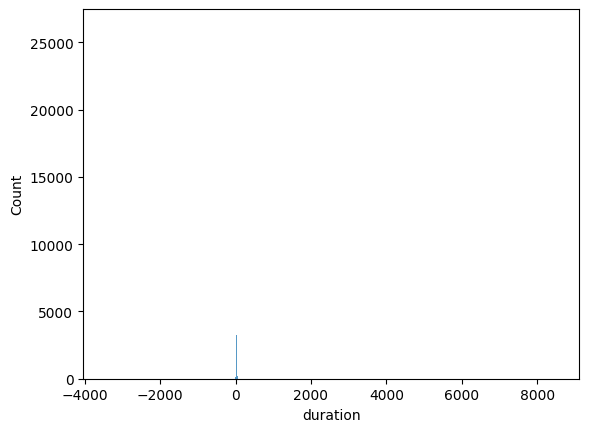

In [256]:
# One of the best ways to describe a variable is to report the values that appear in the dataset and how many times each value appears. This is called distribution of the variable.
sns.histplot(nyc_dataframe.duration)

AxesSubplot(0.125,0.11;0.775x0.77)
98.27547930522405 of the records left, after dropping outliers 98.27547930522405


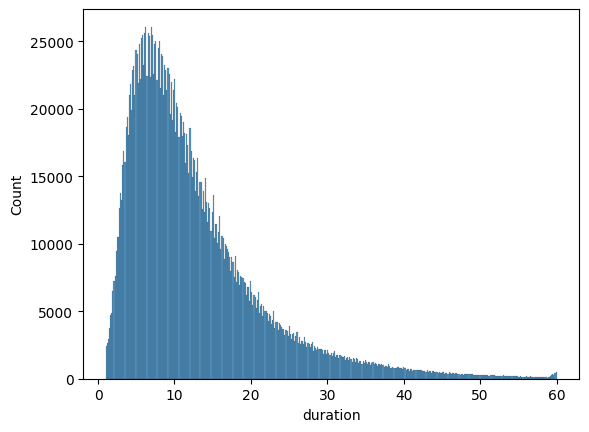

In [257]:
# nyc_dataframe.duration = nyc_dataframe.duration[(nyc_dataframe.duration >= 1) & (nyc_dataframe.duration <= 60)]

before_dropping_outliers = nyc_dataframe.shape[0]
nyc_dataframe = nyc_dataframe[(nyc_dataframe.duration >= 1) & (nyc_dataframe.duration <= 60)]
after_dropping_outliers = nyc_dataframe.shape[0]

fraction_left = (after_dropping_outliers / before_dropping_outliers)*100

# Let's look at the duration's histplot, after dropping outliers
print(sns.histplot(nyc_dataframe.duration))

print(f"{fraction_left} of the records left, after dropping outliers", fraction_left)
